In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Initialize the FRED API with your key
fred = Fred(api_key='5079f41d061a4037d81f3da69e018803') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [4]:
yields.index = pd.to_datetime(yields.index)

In [5]:
# Calculate the standard deviations of Treasury yields of different maturities. 
yields = yields.dropna()
y_std = yields.std()
y_std

1 Month    1.705851
3 Month    1.733347
6 Month    1.746829
1 Year     1.684091
2 Year     1.545413
3 Year     1.446639
5 Year     1.309345
7 Year     1.226457
10 Year    1.174092
20 Year    1.206514
30 Year    1.108774
dtype: float64

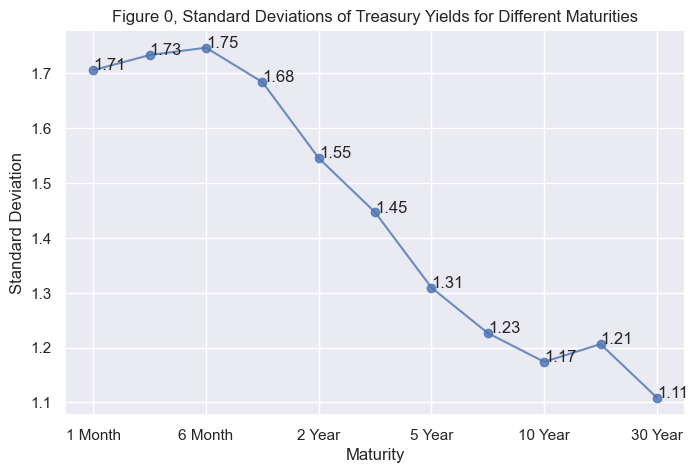

In [6]:
# Draw a graph to present the standard deviations by maturity.
fig, ax = plt.subplots()

# Plot standard deviations of yields of different maturies
plt.xlabel("Maturity")
y_std.plot(figsize = (8,5),marker='o', title='Figure 0, Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8) 
plt.ylabel("Standard Deviation")
for i in range(len(y_std)):
    ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
plt.show()

From the above graph, we see that the standard deviations of U.S. Treasury bonds with short maturities are higher than the U.S. Treasury bonds with longer maturities. The standard deviations for Treasury bonds with maturities of less than one year stay high above 1.7. Then, the standard deviations of Treasury bonds 